#Aula: Cálculo Simples do Volume Molar e Pressão De Saturação a partir de uma Equação De Estado Cúbica
**Objetivo: calcular e desenhar a curva de pressão de saturação...**
* Para uma substância pura (e.g, metano)
* Usando uma *equação de estado* cúbica (e.g, van der Waals)

## Formulação matemática do problema

* Desenha um gráfico ${P}$ contra ${T}$
* Em que para cada ${T}$,
* Para uma substância pura pré definida 
  * A ${P}$ correspondente é a **pressão** de equilíbrio líquido-vapor dessa substância naquela **temperatura**: ${P}^\mathrm{ sat}({T})$
  
  > **Análise de consistência do problema proposto: análise de graus de liberdade de acordo com a regra das fases de Gibbs**
  >* $\nu^{Gibbs} = {C}-{F}+2$
  >* ...........  $= 1-2+2$
  >* ...........  $= 1$
  >
  >**Conclusão:** Um único grau de liberdade: é possível rerpesentar ${P}^\mathrm{ sat}$ como função de uma variável, no caso, ${T}$, o problema proposto é um problema *bem colocado*.

# Pressão de saturação
  * ${P}^{\mathrm{ sat}}$ é a pressão que resolve ${f}^{\mathrm{ L}}({T},{P}) = {f}^{\mathrm { V}}({T},{P})$.
  * ${f}$ é a fugacidade, que para condição de líquido, é dada por ${f}^\mathrm{ L}({T},{P})=\phi({T},\bar{V}^\mathrm{ L}) \times {P}$
  * e, para condição de vapor, é dada por ${f}^\mathrm{ V}$, analogamente.
  * E $\bar{V}^{\mathrm{ L}}$ e $\bar{V}^\mathrm{ V}$ são o volume molar da substância em condição de líquido e de vapor, respectivamente, dados a partir da análise das raízes da solução da equação estado para ${V}$ em função de ${T}$ e ${P}$:
  * $\bar{V}$ são os volumes que resolvem ${P}\bar{V}^3−({P}{b}+{R}{T})\bar{V}^2+{a}\bar{V}−{a}{b}={0}$
    * Se 3 raízes no intervalo Real $\left( b, \infty \right)$
      * $\bar{V}^\mathrm{ L}$ é a menor e $\bar{V}^\mathrm{ V}$ é a maior delas.
    * Se não
      * Não há solução para ${P}^\mathrm{ sat}$ na temperatura em questão.

# A equação de estado
  * A equação de estado é, em sua forma explícita-em-pressão: ${P}=\frac{{R}{T}}{{\bar{V}}-{b}}-\frac{{a}}{{\bar{V}}^2}$
  
  * Em que$a$ e $b$ são parâmetros dependentes da substância, dados por
    * ${a}=\frac{27}{64}\frac{{{Tc}^2}{{R}^2}}{Pc}$
    * ${b}=\frac{{R}{Tc}}{{8}{Pc}}$
  * E ${R}$ é a constante dos gases, que em unidades SI possui o valor:
    * ${R} = 8.3144598$ $\mathrm{{J} {\mathrm{ mol}^{−1}} {\mathrm{ K}^{−1}}}$
    

# Propriedades conhecidas da substância
* A equação de estado de van der Waals depende de algumas poucas propriedades da substância para fazer sua previsão do comportamento delas em condição de líquido ou vapor
  * Temperatura do ponto crítico ${T_c}$
    * ${T_c}^{metano}= 190.70$ $\mathrm{K}$
  * Pressão do ponto crítico ${P_c}$
    * ${P_c}^{metano}= 4641000$ $\mathrm{Pa}$
  

# Implementação em python
* Fazer as rotinas mais básicas e com operação independente
* Testar cada uma delas
* Fazer as rotinas de nível mais alto, chamando as básicas (adaptar as básicas conforme necessário)

# Constantes

In [1]:
R = 8.3144598 #J.mol^−1.K^−1

In [2]:
Tc = 190.70
Pc = 4641000

In [3]:
a = 27/64*((Tc**2)*(R**2)/Pc)
print(a)

0.22852919171043937


In [4]:
b = (R*Tc)/(8*Pc)
print(b)

4.270543750969618e-05


# Função básica 1
* EoS em representação ${P}({T},\bar{V})$

In [5]:
def function_P(T,V):
    return R*T/(V-b) - a/(V**2)
print(function_P(298,0.0224))

110367.83846352057


# Função básica 2: Calculadora de volume
* Calcular $\bar{V}$ que resolve ${P}{\bar{V}^3}−({P}{b}+{R}{T}){\bar{V}^2}+{a}\bar{V}−{a}{b}={0}$

** 1 raiz real: método de Newton-Raphson:**

* ${Res}={c_3}\bar{V}^3+{c_2}\bar{V}^2+{c_1}\bar{V}+{c_0}$
* $\frac{\partial {Res}}{\partial {V}}=3{c_3}\bar{V}^2+2{c_2}\bar{V}+{c_1}$
* $\bar{V}_1^{[{k}+1]}=\bar{V}_1^{[{k}]}-\frac{Res}{ {\partial {Res}}/{\partial \bar{V}} }$
** Estimativa inicial: gás ideal:**
* $\bar{V}_1^{[0]} = \frac{{R}{T}}{P}$

**Mais duas raízes: Método de redução de ordem de polinômio:**
* ${c_3}\bar{V}^3+{c_2}\bar{V}^2+{c_1}\bar{V}+c_0=(\bar{V}-\bar{V}_1)({c_4}\bar{V}^2+{c_5}\bar{V}+{c_6})$
* ...............................................$={c_4}\bar{V}^3+({c_5}-{c_4}\bar{V}_1)\bar{V}^2+({c_6}-{c_5}\bar{V}_1)\bar{V}+(-{c_6}\bar{V}_1)$
* ${c_4} = {c_3}$
* ${c_5} = {c_2}+{c_4}\bar{V}_1$
* ${c_6} = {c_1}+{c_5}\bar{V}_1$

**Soluçãos das raizes de uma parábola:**
* $\bar{V}_2 = \frac{-{c_5}+\sqrt{{c_5}^2-4{c_4}{c_6}}}{2{c_4}}$
* $\bar{V}_3 = \frac{-{c_5}-\sqrt{{c_5}^2-4{c_4}{c_6}}}{2{c_4}}$

In [6]:
import numpy

In [7]:
def function_V(T,P):
    c3 = P #coefficient for v^3
    c2 = -(P*b+R*T) #coefficient v^2
    c1 = a  #coefficient v^1
    c0 = -a*b  #coefficient v^0
    
    RES=1
    TOL=1e-9
    MAX=1000
    i=0
    V=R*T/P
    V2=0
    V3=0
    while(RES>TOL and i<MAX): #Kernel > Interrupt (console > Ctrl+C)
        V=V-(c3*V**3+c2*V**2+c1*V+c0)/(3*c3*V**2+2*c2*V+c1)
        RES=c3*V**3+c2*V**2+c1*V+c0
        i=i+1

# calc r2 and r3
    
    c4=c3
    c5=c2+c4*V
    c6=c1+c5*V
    
    delta=(c5**2)-(4*c4*c6)
    
    if delta >= 0:
        V2=(-c5+numpy.sqrt(delta))/(2*c4)
        V3=(-c5-numpy.sqrt(delta))/(2*c4)
    else:
        V2=0
        V3=0

# filter V in (b,infnty)
    if V<b:
        V=0
    if V2<b:
        V2=0
    if V3<b:
        V3=0

    [V,V2,V3]=numpy.sort([V,V2,V3])
    
    return [V,V2,V3]
    
tryT=150
tryP=100000

[ansv1,ansv2,ansv3]=function_V(tryT,tryP)

print(ansv1,"---",function_P(tryT,ansv1))
print(ansv2,"---",function_P(tryT,ansv2))
print(ansv3,"---",function_P(tryT,ansv3))

6.75794571678e-05 --- 99999.9407836
0.000117127280359 --- 99999.9934113
0.0123296884 --- 100000.0


# Função básica 3
* energia de Gibbs residual
$${\bar{G}^\mathrm{ Res}} = {P}\bar{V}-{R}{T}-\frac{a}{\bar{V}} -{R}{T} \times ln \left (\frac{{P}(\bar{V}-{b})}{{R}{T}} \right )$$

In [8]:
def Residual_G(T,P,V):
    return (P*V)-(R*T)-(a/V)-T*(R*numpy.log(P*(V-b)/(R*T)))

In [9]:
T=100
P=100
Vs=function_V(T,P)
print(function_V(T,P))
print(Residual_G(T,P,Vs[0]))
print(Residual_G(T,P,Vs[1]))
print(Residual_G(T,P,Vs[2]))

[5.2878384099308177e-05, 0.00022198541292123546, 8.314227641640489]
6165.88914904
7072.6173642
-0.0232155227939


In [10]:
def P_sat(T,iguess_P):
    RES=1
    TOL=1e-9
    MAX=1000
    i=0
    P=iguess_P
    while(RES>TOL and i<MAX): #Kernel > Interrupt (console > Ctrl+C)
        [V_L,_,V_V]=function_V(T,P)
        phi_L=numpy.exp(Residual_G(T,P,V_L)/(R*T))
        phi_V=numpy.exp(Residual_G(T,P,V_V)/(R*T))
        P=P*(phi_L/phi_V)
        RES=phi_L/phi_V-1.
        i=i+1
#        print("P,V_L,V_V,phi_L,phi_V")
#        print(P,V_L,V_V,phi_L,phi_V,phi_L/phi_V-1.)
    return P

Psat=P_sat(100,100)
print("Psat =                                                                ",Psat)

Psat=P_sat(110,100)
print("Psat =                                                                ",Psat)
Psat=P_sat(120,100)
print("Psat =                                                                ",Psat)
Psat=P_sat(130,100)
print("Psat =                                                                ",Psat)

Psat =                                                                 176822.348587
Psat =                                                                 319937.043271
Psat =                                                                 527850.387512
Psat =                                                                 811605.366269


# Grid, Calc and Plot

In [11]:
T=100
guessP=100
Taxis=numpy.linspace(100,Tc,1000)
Paxis=numpy.zeros(1000)
Paxis[0]=P_sat(Taxis[0],guessP)
for i in range(1,999):
    Paxis[i]=P_sat(Taxis[i],Paxis[i-1])
    print(Paxis[i])

177865.876139
178913.754822
179965.994145
181022.603612
182083.592721
183148.970964
184218.747828
185292.932795
186371.535338
187454.564928
188542.031028
189633.943093
190730.310577
191831.142923
192936.449572
194046.239955
195160.523501
196279.309628
197402.607753
198530.427284
199662.777622
200799.668163
201941.108297
203087.107407
204237.674869
205392.820055
206552.552328
207716.881046
208885.815559
210059.365213
211237.539344
212420.347286
213607.798362
214799.901891
215996.667185
217198.103548
218404.220279
219615.026669
220830.532004
222050.74556
223275.67661
224505.334418
225739.728241
226978.86733
228222.760929
229471.418293
230724.848616
231983.061139
233246.065078
234513.869641
235786.484032
237063.917444
238346.179065
239633.278076
240925.223651
242222.024956
243523.691151
244830.231387
246141.654809
247457.970555
248779.187755
250105.315532
251436.363003
252772.339275
254113.253449
255459.11462
256809.931874
258165.714289
259526.470938
260892.210884
262262.943184
263638.676

C:\Users\iuri\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\iuri\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [12]:
import matplotlib

In [13]:
%matplotlib inline

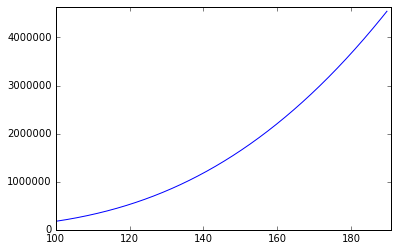

In [14]:
matplotlib.pyplot.figure(1)
matplotlib.pyplot.plot(Taxis,Paxis)

matplotlib.pyplot.xlim([100,Tc])
matplotlib.pyplot.ylim([100,Pc])

matplotlib.pyplot.show()